In [18]:
import pandas as pd
from matplotlib import font_manager, rc
import folium

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

## Q1. 전국 시도별 약국수를 구해주세요!

In [2]:
# value_counts 사용하기
df.loc[df["상권업종소분류명"] == "약국","시도명"].value_counts()

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

In [3]:
# groupby 사용하기
df_pharmacy = df[df["상권업종소분류명"] == "약국"]

df_pharmacy[["상권업종소분류명","시도명"]].groupby("시도명").count().sort_values(by="상권업종소분류명", ascending = False)

,상권업종소분류명
시도명,
경기도,4510
서울특별시,3579
부산광역시,1130
경상남도,1017
인천광역시,1002
경상북도,915
대구광역시,870
전라북도,862
충청남도,830


##  Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 

## 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다.

## 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

In [4]:
df_animal_clinic = df.loc[df["상권업종소분류명"] == "동물병원","시도명"].value_counts().copy()
df_animal_clinic

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64

<AxesSubplot:>

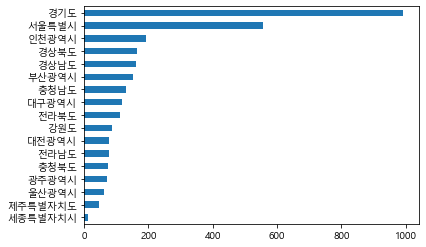

In [5]:
#시각화
df_animal_clinic.sort_values().plot.barh()

## Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 

## 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있

## 는지 알아보겠습니다.
* 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
* 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
* 비율이 높은 순서대로 정렬되게 구해주세요!
* 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
* 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

In [6]:
#"피부"나 "성형"이 들어간 분류명 찾기
name_list = []

for i in df["상권업종소분류명"].unique():
    if "피부" in i or "성형" in i:
        name_list.append(i)
        
name_list

['정형/성형외과', '피부과']

In [7]:
# 서울 병원 데이터 변수 설정
df_seoul = df[df["시도명"] == "서울특별시"].copy()

In [8]:
# 서울의 전체 병원 수 구하기
df_seoul["상권업종소분류명"].unique()

array(['내과/외과', '정형/성형외과', '소아과', '약국', '한의원', '치과의원', '일반병원', '기타병원',
       '침구원', '이비인후과의원', '동물병원', '척추교정치료', '피부과', '산부인과', '한약방', '종합병원',
       '탕제원', '산후조리원', '노인/치매병원', '한방병원', '언어치료', '응급구조대', '치과병원', '혈액원',
       '안과의원', '신경외과', '비뇨기과', '유사의료업기타', '치과기공소', '수의업-종합', '접골원', '조산원',
       '수의업-기타'], dtype=object)

In [9]:
#병원이 아닌 데이터의 행 구하기
drop_row = df_seoul[df_seoul["상권업종소분류명"].str.contains("수의업-기타|조산원|접골원|수의업-종합|치과기공소|유사의료업기타|혈액원|응급구조대|언어치료|산후조리원|탕제원|한약방|척추교정치료|동물병원|침구원|약국")].index.tolist()
drop_row

[33,
 51,
 113,
 130,
 136,
 141,
 142,
 167,
 176,
 205,
 261,
 270,
 288,
 292,
 325,
 327,
 337,
 341,
 344,
 401,
 412,
 414,
 429,
 430,
 435,
 444,
 459,
 469,
 472,
 481,
 504,
 517,
 547,
 581,
 1048,
 1077,
 1098,
 1130,
 1204,
 1208,
 1249,
 1250,
 1256,
 1261,
 1265,
 1266,
 1268,
 1270,
 1322,
 1349,
 1371,
 1379,
 1387,
 1388,
 1505,
 1507,
 1566,
 1567,
 1574,
 1579,
 1596,
 1620,
 1632,
 1634,
 1653,
 1690,
 1698,
 1700,
 1703,
 1706,
 1708,
 1721,
 1727,
 1736,
 1765,
 1768,
 1777,
 1779,
 1780,
 1781,
 1789,
 1791,
 1792,
 1795,
 1796,
 1819,
 1821,
 1830,
 1834,
 1839,
 1853,
 1866,
 1868,
 1869,
 1893,
 1903,
 1907,
 1916,
 1926,
 1929,
 1936,
 1948,
 1968,
 1979,
 1992,
 2043,
 2054,
 2060,
 2064,
 2065,
 2075,
 2076,
 2085,
 2087,
 2088,
 2089,
 2126,
 2142,
 2183,
 2215,
 2235,
 2238,
 2267,
 2281,
 2283,
 2291,
 2292,
 2301,
 2322,
 2336,
 2356,
 2364,
 2366,
 2371,
 2376,
 2382,
 2401,
 2413,
 2422,
 2423,
 2433,
 2477,
 2478,
 2536,
 2558,
 2561,
 2570,
 2634,


In [10]:
# 해당 셀을 삭제하고 삭제 전과 후의 행의 갯수를 비교
print(df_seoul.shape)
df_seoul = df_seoul.drop(drop_row, axis = 0)
print(df_seoul.shape)

(18943, 39)
(13406, 39)


In [11]:
# "피부과" 또는 "정형/성형외과" 필터링하기
filtered = (df_seoul["상권업종소분류명"] == "피부과") | (df_seoul["상권업종소분류명"] == "정형/성형외과")

# 필터 기준 시군구 별 병원 수
a = df_seoul.loc[filtered,"시군구명"].value_counts()

# 서울 전체 병원 수
b = df_seoul["시군구명"].value_counts()

In [17]:
# "피부과" + "정형/성형외과" / "전체 병원 수"
c = (a/b).sort_values(ascending=False)
c.round(2)

강남구     0.24
서초구     0.17
마포구     0.09
서대문구    0.08
영등포구    0.08
강동구     0.07
중구      0.07
중랑구     0.07
강서구     0.07
양천구     0.07
송파구     0.06
광진구     0.06
은평구     0.06
성북구     0.06
구로구     0.06
금천구     0.05
노원구     0.05
성동구     0.05
강북구     0.05
용산구     0.05
관악구     0.04
동대문구    0.04
동작구     0.04
종로구     0.03
도봉구     0.02
Name: 시군구명, dtype: float64

## Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의
## 료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디
## 에 위치하고 있는지를 찾아보고자 합니다.
* folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!

In [59]:
# 전국 병원 중 '노인/치매병원' 데이터 변수 설정 
df_sliver = df[df["상권업종소분류명"] == "노인/치매병원"]

In [61]:
map = folium.Map(location = [df_sliver["위도"].mean()-0.3, df_sliver["경도"].mean()], zoom_start = 7)
map

In [66]:
for n in df_sliver.index:
    name = df_sliver.loc[n,"상호명"]
    address = df_sliver.loc[n,"도로명주소"]
    popup = f"{name}-{address}"
    location = [df_sliver.loc[n,"위도"], df_sliver.loc[n,"경도"]]
    folium.Marker(
        location = location,
        popup = popup
    ).add_to(map)
    
map 